<a href="https://colab.research.google.com/github/diaruizja/Sistemas_de_recomendaci-n/blob/master/Sistemas_de_recomendaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 6: Sistemas de recomendación

## Dataset

El dataset que vamos a usar en este proyecto es el del proyecto [MovieLens](http://grouplens.org/datasets/movielens/). Estos son relevados por el grupo de investigación GroupLens de la Universidad de Minnesota. Vamos a usar la versión 100K.

Está basado en un sistema de rating de 5 estrellas y texto libre para tags a partir del servicio de recomendaciones MovieLens. Contiene 100.000 ratings para 1.682 películas. Los datos fueron creados por 943 usuarios.

En el [Readme](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt) del dataset se puede encontrar información adicional. A continuación vamos a describir cada uno de ellos.

### Ratings (u.data)

Cada línea representa el rating para una película para un usuario. Los ratings están basados en un sistema de 5 estrellas, con una salto de 0.5 estrellas. Los timestamps están expresados en segundos desde la medianoche de 01/1970 (UTC). El formato es:

`user id | item id | rating | timestamp`

### Usuarios (u.users)

Cada línea del archivo representa un usuario. Se incluye información demográfica. El formato es:

`user id | age | gender | occupation | zip code`

### Películas (u.item)

Cada línea corresponde a una película. Puede haber inconsistencias en los nombres. El formato es:

`movie id | movie title | release date | video release date | IMDb URL | generos`



Las columnas con los generos son binarias indicando la presencia o ausencia de cada uno en la película. Los géneros pueden ser:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* unknown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Experimentación

Durante todo este proyecto vamos a utilizar la librería `surprise` para llevar a cabo las experimentaciones.

Como se mencionó en clase, las implementaciones en esta librería tiene algunas mejoras respecto de las estrategias convencionales como SVD. Esto se traduce en una mayor cantidad de parámetros para optimizar.

Vamos a levantar los datos. En primer lugar, definamos el formato para poder leer los datos.

**1) Utilizar** el `Reader` con el parámetro `line_format` igual a `'user item rating timestamp'` y `sep` como `'\t'`. Guardarlo en una variable `reader`.

In [ ]:
pip install surprise

     |████████████████████████████████| 6.5MB 6.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675748 sha256=123f9df63aeb30e8a3be01b0965f9fe0ccb6c8cf7c63a5116b7fc92e1e4d91b5
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset
from surprise import Reader
import pandas as pd

In [ ]:
reader = Reader(line_format = 'user item rating timestamp' , sep = '\t')

Utilizando este `reader` cargar los datos:

In [ ]:
data = Dataset.load_from_file('/content/drive/My Drive/Data Science/Entregas de proyectos/Entrega #6/ml-100k/u.data', reader=reader)

In [ ]:
data.raw_ratings

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013'),
 ('62', '257', 2.0, '879372434'),
 ('286', '1014', 5.0, '879781125'),
 ('200', '222', 5.0, '876042340'),
 ('210', '40', 3.0, '891035994'),
 ('224', '29', 3.0, '888104457'),
 ('303', '785', 3.0, '879485318'),
 ('122', '387', 5.0, '879270459'),
 ('194', '274', 2.0, '879539794'),
 ('291', '1042', 4.0, '874834944'),
 ('234', '1184', 2.0, '892079237'),
 ('119', '392', 4.0, '886176814'),
 ('167', '486', 4.0, '892738452'),
 ('299', '144', 4.0, '877881320'),
 ('291', '118', 2.0, '874833878'),
 ('308', '1', 4.0, '887736532'),
 ('95', '546', 2.0, '879196566'),
 ('38', '95', 5.0, '892430094'),
 ('102', '768', 2.0, '883748450'),
 ('63', '277', 4.0, '875747401

In [ ]:
df = pd.DataFrame(data.raw_ratings)

In [ ]:
df.columns=["user_id", "item_id", "rating", "timestamp"] #se renombran las columnas del dataframe
df.head(5)

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    100000 non-null  object 
 1   item_id    100000 non-null  object 
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


__2) Ejecutar una corrida inicial usando cross validation y el algoritmo SVD (5 folds). Imprimir los RMSE de testing.__

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate

algorit = SVD()
cv = cross_validate(algorit, data, measures=['RMSE'], cv=5, verbose=True, n_jobs=-1)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9401  0.9322  0.9467  0.9303  0.9342  0.9367  0.0060  
Fit time          9.30    10.19   10.64   9.48    5.60    9.04    1.79    
Test time         0.25    0.33    0.25    0.25    0.15    0.25    0.06    


__3) Evaluar el RMSE (promedio de cross validation) de testing de acuerdo a la cantidad de factores en SVD.__

**Como en entregas anteriores se puede experimentar con los parámetros del paso 3, por ejemplo el número de factores, para evaluar cambios de accuracy.**

In [ ]:
import numpy as np
rmse_test_means = []

factors = [5,25, 50, 100,200, 300, 400, 500] #se toman 8 factores a criterio personal para realizar la evaluacion
for i in factors:
    algoritmo = SVD(n_factors=i)
    cv = cross_validate(algoritmo, data, measures=['RMSE'],  cv=3, verbose=False, n_jobs=-1)
    rmse_test_means.append(np.mean(cv['test_rmse']))

rmse_test_means

[0.9432138336155611,
 0.9428886871578919,
 0.9408882869387853,
 0.9455743973329039,
 0.9517229761328481,
 0.9562743508000892,
 0.9599078490176572,
 0.9641515992737507]

__4) Graficar los promedios RMSE del conjunto de testing de acuerdo a la cantidad de factores en SVD.__

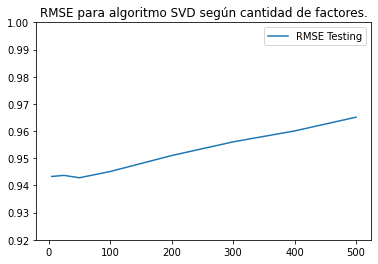

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(factors, rmse_test_means, label='RMSE Testing')
plt.ylim((0.92, 1.0))
plt.legend(loc="best")
plt.title("RMSE para algoritmo SVD según cantidad de factores.")
plt.show()

__5) Usando GridSearch, encontrar el mejor estimador usando SVD con 500 factores. Imprimir el mejor rmse. Utilizar `refit` para obtener el mejor estimador ya ajustado como resultado.__

Utilizar el espacio de parámetros:
* n_epochs: [5, 10]
* lr_all: [0.002, 0.005]
* reg_all: [0.4, 0.6]


In [ ]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_factors': [500], 'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],'reg_all': [0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

gs.fit(data)

In [ ]:
print(gs.best_params['rmse'])

{'n_factors': 500, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [ ]:
print(gs.best_score['rmse'])

0.9642328066424316


**Ahora se reentrena el modelo con los parametros ajustados para iniciar con las predicciones**

In [ ]:
clf = SVD(n_factors = 500, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)

In [ ]:
train_set = data.build_full_trainset()

In [ ]:
clf.fit(train_set)

__6) Obtener una predicción para el usuario 321 para la película Titanic.__

**La función predict debe recibir como strings tanto el user_id como el movie_id. No devuelve el resultado correcto si se pasa alguno como entero o el nombre de la película. Primero tenes que obtener el id de la película pedida.**

In [ ]:
items = pd.read_table("/content/drive/My Drive/Data Science/Entregas de proyectos/Entrega #6/ml-100k/u.item", sep="|", header=None, encoding="latin-1")
items.drop([3],axis = 1,inplace =True)
col_drop = [i for i in range(5,len(items.columns)+1)]
items.drop(col_drop,axis = 1,inplace =True)
items.columns = ["movie_id", "title", "release_date","URL",]
items.set_index("movie_id", inplace= True)

items.head()

,title,release_date,URL
movie_id,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [ ]:
items.loc[items ["title"].str.contains("Titanic")]

,title,release_date,URL
movie_id,,,
313,Titanic (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-12...


In [ ]:
uid="321"
iid="313"

In [ ]:
pred = clf.predict(uid, iid, verbose=True)
pred

user: 321        item: 313        r_ui = None   est = 3.98   {'was_impossible': False}


Prediction(uid='321', iid='313', r_ui=None, est=3.979558936985505, details={'was_impossible': False})

In [ ]:
pred.est

3.979558936985505

**La prediccion para el usuario 321 para la pelicula Titanic es de 3.47 segun el clasificador entrenado con los mejores parametros escogidos para este.**

__7) Desarrollar una función que dado un usuario, obtenga la mejor predicción disponible (de acuerdo a nuestros datos de películas).__

In [ ]:
uid=input("Ingresa el id del usuario para el que deseas la predección: ")
prediccion = []

def prediccion_disponible(uid, idd):
  for iid in range(0, len(items)):
    pred = clf.predict(uid, str(iid), verbose=True)
    prediccion.append(pred.est)
  return prediccion
  
prediccion_disponible(uid, iid)
print(prediccion)

Ingresa el id del usuario para el que deseas la predección: 50
user: 50         item: 0          r_ui = None   est = 3.50   {'was_impossible': False}
user: 50         item: 1          r_ui = None   est = 3.75   {'was_impossible': False}
user: 50         item: 2          r_ui = None   est = 3.35   {'was_impossible': False}
user: 50         item: 3          r_ui = None   est = 3.19   {'was_impossible': False}
user: 50         item: 4          r_ui = None   est = 3.49   {'was_impossible': False}
user: 50         item: 5          r_ui = None   est = 3.35   {'was_impossible': False}
user: 50         item: 6          r_ui = None   est = 3.53   {'was_impossible': False}
user: 50         item: 7          r_ui = None   est = 3.73   {'was_impossible': False}
user: 50         item: 8          r_ui = None   est = 3.81   {'was_impossible': False}
user: 50         item: 9          r_ui = None   est = 3.72   {'was_impossible': False}
user: 50         item: 10         r_ui = None   est = 3.76   {'was_

In [ ]:
df_pred=pd.DataFrame(prediccion)
df_pred.columns=["Predicciones"]
df_pred=df_pred.sort_values("Predicciones", ascending=False)
df_pred.head(5)

,Predicciones
408,4.232266
169,4.216103
318,4.191992
64,4.173244
483,4.138865


In [ ]:
df_pred["Predicciones"].idxmax()

408

**A continuacion se muestra la mejor prediccion dsiponible que nos provee el modelo entrenado**

In [ ]:
df_pred["Predicciones"][408]

4.232266381165081